In [97]:
import pandas as pd
import numpy as np

### Read, merge data

In [98]:
df1 = pd.read_csv('../data/allstate/cgr-premiums-table.csv')

In [99]:
df2 = pd.read_csv('../data/allstate/territory-definitions-table.csv')

In [100]:
len(df1), len(df2)

(92792, 580)

In [101]:
df1.head()

territory gender  birthdate  ypc  current_premium  indicated_premium  \
0        601      M  10/5/1947    0           863.97             830.58   
1        601      F   7/6/1953    0           828.63             611.14   
2        601      M  4/18/1956    0          1000.59             593.99   
3        601      F  8/16/1956    0           700.42             547.95   
4        601      F  1/23/1957    0           505.92             448.33   

   selected_premium  underlying_premium  fixed_expenses  \
0            862.57              673.06          175.98   
1            826.43              612.75          175.98   
2            996.60              858.20          175.98   
3            697.84              571.49          180.48   
4            504.56              333.71          152.08   

   underlying_total_premium  cgr_factor  cgr  
0                    849.04        1.02  ZHK  
1                    788.73        1.06  6NS  
2                   1034.18        0.96  Z2D  
3                    751.97        0.91  D7G  
4                    485.79        1.06  3YN

In [102]:
df2.head()

county  county_code  territory  zipcode           town  area
0  ALLEGANY            1       1502    21502     CRESAPTOWN   160
1  ALLEGANY            1       1502    21502     CUMBERLAND   160
2  ALLEGANY            1       1521    21521         BARTON   160
3  ALLEGANY            1       1524    21524  CORRIGANVILLE   160
4  ALLEGANY            1       1529    21529      ELLERSLIE   160

In [103]:
df2[df2['territory'] == 1136]

county  county_code  territory  zipcode          town  area
88   BALTIMORE            3       1136    21136  REISTERSTOWN   260
173    CARROLL            6       1136    21136  REISTERSTOWN   270

In [104]:
# remove dupe territories
df2 = df2[~df2['territory'].duplicated()].copy()

In [105]:
df2.reset_index(drop=True, inplace=True)

In [106]:
df = df1.merge(df2, on='territory', suffixes=('', ''))

In [107]:
df.shape

(92792, 17)

#### Merge ACS dataset

In [108]:
# get demographics
df3 = pd.read_csv('../data/allstate/ACS_MD_15_5YR_DP05.csv')

In [109]:
df3['population'] = df3['HC01_VC88'] + df3['HC01_VC94'] + df3['HC01_VC95'] + df3['HC01_VC96'] + df3['HC01_VC97'] + df3['HC01_VC98'] + df3['HC01_VC99']

In [110]:
df3['perc_nonwhite'] = 100 * (df3['population'] - df3['HC01_VC94']) / df3['population']

In [111]:
# remove missing data
df3[df3['perc_nonwhite'].isna()]

GEO.id  GEO.id2 GEO.display-label  HC01_VC03  HC02_VC03  \
59   8600000US20701    20701       ZCTA5 20701          0         12   
168  8600000US21031    21031       ZCTA5 21031          0         12   
267  8600000US21240    21240       ZCTA5 21240          0         12   

     HC03_VC03  HC04_VC03  HC01_VC04  HC02_VC04  HC03_VC04  HC04_VC04  \
59           0        NaN          0         12        NaN        NaN   
168          0        NaN          0         12        NaN        NaN   
267          0        NaN          0         12        NaN        NaN   

     HC01_VC05  HC02_VC05  HC03_VC05  HC04_VC05  HC01_VC08  HC02_VC08  \
59           0         12        NaN        NaN          0         12   
168          0         12        NaN        NaN          0         12   
267          0         12        NaN        NaN          0         12   

     HC03_VC08  HC04_VC08  HC01_VC09  HC02_VC09  HC03_VC09  HC04_VC09  \
59         NaN        NaN          0         12        NaN        NaN   
168        NaN        NaN          0         12        NaN        NaN   
267        NaN        NaN          0         12        NaN        NaN   

     HC01_VC10  HC02_VC10  HC03_VC10  HC04_VC10  HC01_VC11  HC02_VC11  \
59           0         12        NaN        NaN          0         12   
168          0         12        NaN        NaN          0         12   
267          0         12        NaN        NaN          0         12   

     HC03_VC11  HC04_VC11  HC01_VC12  HC02_VC12  HC03_VC12  HC04_VC12  \
59         NaN        NaN          0         12        NaN        NaN   
168        NaN        NaN          0         12        NaN        NaN   
267        NaN        NaN          0         12        NaN        NaN   

     HC01_VC13  HC02_VC13  HC03_VC13  HC04_VC13  HC01_VC14  HC02_VC14  \
59           0         12        NaN        NaN          0         12   
168          0         12        NaN        NaN          0         12   
267          0         12        NaN        NaN          0         12   

     HC03_VC14  HC04_VC14  HC01_VC15  HC02_VC15  HC03_VC15  HC04_VC15  \
59         NaN        NaN          0         12        NaN        NaN   
168        NaN        NaN          0         12        NaN        NaN   
267        NaN        NaN          0         12        NaN        NaN   

     HC01_VC16  HC02_VC16  HC03_VC16  ...  HC01_VC95  HC02_VC95  HC03_VC95  \
59           0         12        NaN  ...          0         12        NaN   
168          0         12        NaN  ...          0         12        NaN   
267          0         12        NaN  ...          0         12        NaN   

     HC04_VC95  HC01_VC96  HC02_VC96  HC03_VC96  HC04_VC96  HC01_VC97  \
59         NaN          0         12        NaN        NaN          0   
168        NaN          0         12        NaN        NaN          0   
267        NaN          0         12        NaN        NaN          0   

     HC02_VC97  HC03_VC97  HC04_VC97  HC01_VC98  HC02_VC98  HC03_VC98  \
59          12        NaN        NaN          0         12        NaN   
168         12        NaN        NaN          0         12        NaN   
267         12        NaN        NaN          0         12        NaN   

     HC04_VC98  HC01_VC99  HC02_VC99  HC03_VC99  HC04_VC99  HC01_VC100  \
59         NaN          0         12        NaN        NaN           0   
168        NaN          0         12        NaN        NaN           0   
267        NaN          0         12        NaN        NaN           0   

     HC02_VC100  HC03_VC100  HC04_VC100  HC01_VC101  HC02_VC101  HC03_VC101  \
59           12         NaN         NaN           0          12         NaN   
168          12         NaN         NaN           0          12         NaN   
267          12         NaN         NaN           0          12         NaN   

     HC04_VC101  HC01_VC102  HC02_VC102  HC03_VC102  HC04_VC102  HC01_VC104  \
59          NaN           0          12         NaN         NaN           0   
16

In [112]:
df3 = df3[~df3['perc_nonwhite'].isna()].copy()

In [113]:
df3['perc_nonwhite'].describe()

count    465.000000
mean      27.705376
std       26.670255
min        0.000000
25%        7.324339
50%       18.388255
75%       40.871738
max      100.000000
Name: perc_nonwhite, dtype: float64

<AxesSubplot:>

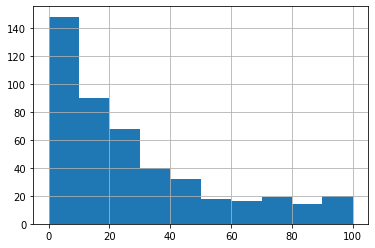

In [114]:
df3['perc_nonwhite'].hist()

In [115]:
# TODO: play with minority threshold
df3['majority_minority'] = df3['perc_nonwhite'] > 0.75

In [116]:
df3['majority_minority'].value_counts()

True     424
False     41
Name: majority_minority, dtype: int64

In [117]:
df3 = df3[['GEO.id2', 'population', 'perc_nonwhite', 'majority_minority']].copy()

In [118]:
len(df3)

465

In [119]:
# merge
df = df.merge(df3, left_on='zipcode', right_on='GEO.id2')

In [120]:
# NOTE: lost 5 policyholders w/ a match
len(df)

92786

In [121]:
df.head()

territory gender  birthdate  ypc  current_premium  indicated_premium  \
0        601      M  10/5/1947    0           863.97             830.58   
1        601      F   7/6/1953    0           828.63             611.14   
2        601      M  4/18/1956    0          1000.59             593.99   
3        601      F  8/16/1956    0           700.42             547.95   
4        601      F  1/23/1957    0           505.92             448.33   

   selected_premium  underlying_premium  fixed_expenses  \
0            862.57              673.06          175.98   
1            826.43              612.75          175.98   
2            996.60              858.20          175.98   
3            697.84              571.49          180.48   
4            504.56              333.71          152.08   

   underlying_total_premium  cgr_factor  cgr   county  county_code  zipcode  \
0                    849.04        1.02  ZHK  CHARLES            8    20601   
1                    788.73        1.06  6NS  CHARLES            8    20601   
2                   1034.18        0.96  Z2D  CHARLES            8    20601   
3                    751.97        0.91  D7G  CHARLES            8    20601   
4                    485.79        1.06  3YN  CHARLES            8    20601   

      town  area  GEO.id2  population  perc_nonwhite  majority_minority  
0  WALDORF   210    20601       24233      58.758717               True  
1  WALDORF   210    20601       24233      58.758717               True  
2  WALDORF   210    20601       24233      58.758717               True  
3  WALDORF   210    20601       24233      58.758717               True  
4  WALDORF   210    20601       24233      58.758717               True

### Expo

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92786 entries, 0 to 92785
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   territory                 92786 non-null  int64  
 1   gender                    92786 non-null  object 
 2   birthdate                 92786 non-null  object 
 3   ypc                       92786 non-null  int64  
 4   current_premium           92786 non-null  float64
 5   indicated_premium         92786 non-null  float64
 6   selected_premium          92786 non-null  float64
 7   underlying_premium        92786 non-null  float64
 8   fixed_expenses            92786 non-null  float64
 9   underlying_total_premium  92786 non-null  float64
 10  cgr_factor                92786 non-null  float64
 11  cgr                       92786 non-null  object 
 12  county                    92786 non-null  object 
 13  county_code               92786 non-null  int64  
 14  zipcod

#### Add age

In [123]:
today = pd.to_datetime('today').strftime('%m-%d-%Y')

In [124]:
df['age'] = pd.to_datetime(today) - pd.to_datetime(df['birthdate'])

In [125]:
df['age'] = df['age'].dt.days / 365.2425

<AxesSubplot:>

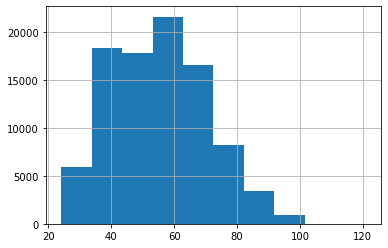

In [126]:
df['age'].hist()

In [127]:
df['majority_minority'].value_counts()

True     92503
False      283
Name: majority_minority, dtype: int64

In [128]:
# Allstate sells 30x times more in minority zipcodes
(92503/424)/(283/41)

31.607298819921326

<AxesSubplot:>

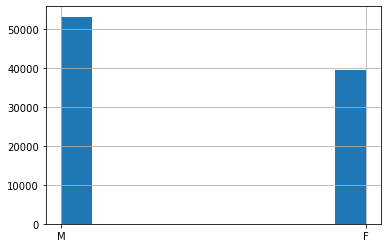

In [129]:
df['gender'].hist()

In [130]:
df['ypc'].value_counts()

5    61532
1     9139
3     6448
2     6425
0     4675
4     4567
Name: ypc, dtype: int64

<AxesSubplot:>

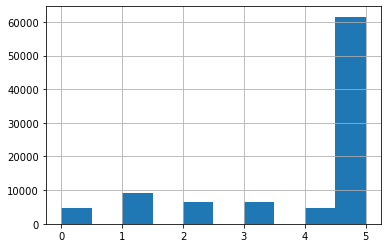

In [131]:
df['ypc'].hist()

In [132]:
# made up random variable to deal with missing data
# df['risk_profile'] = np.random.normal(loc=0, scale=10, size=len(df))

### Q: Who is the rate hike hurting?

#### Potentially those with same current premium, but different rate hikes

In [133]:
import matplotlib.pylab as plt
import seaborn as sns

In [134]:
# current premium ~ paying now
# indicated premium (ideal price) ~ should be paying
# selected premium (transition price) ~ retention-based (final premium)
# underlying premium ~ ?

#### Add change in premium

In [135]:
df['change_in_premium'] = df['selected_premium'] - df['current_premium']

In [136]:
df['change_in_premium'].describe()

count    92786.000000
mean        27.385218
std         74.879726
min        -32.800000
25%         -2.020000
50%         -0.140000
75%         36.990000
max       1346.150000
Name: change_in_premium, dtype: float64

<AxesSubplot:xlabel='current_premium', ylabel='change_in_premium'>

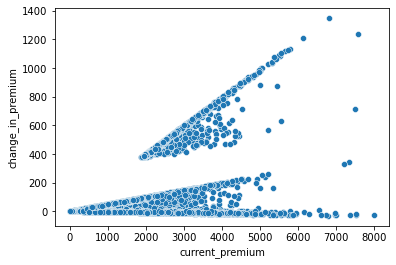

In [137]:
# clearly a bifurcation around change in premium of $400
sns.scatterplot(x='current_premium', y='change_in_premium', data=df)

In [138]:
df['age_'] = df['age'].round().astype(int)

#### Add risk group

In [139]:
# NOTE: two policies at 260.05
df['risk_group'] = np.where(df['change_in_premium'] <= 260.05, 0, 1)

In [140]:
df = df.join(pd.get_dummies(df['risk_group'], prefix='risk_group'))

In [141]:
df['risk_group'].value_counts(normalize=True)

0    0.980223
1    0.019777
Name: risk_group, dtype: float64

<AxesSubplot:>

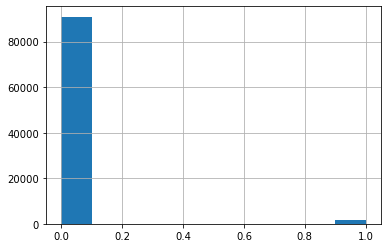

In [142]:
df['risk_group'].hist()

#### Make table for report

In [143]:
change_in_prem_1 = df[df['risk_group'] == 1]['change_in_premium'].describe()

In [144]:
riskgrp1 = pd.DataFrame(change_in_prem_1).rename(columns={'change_in_premium': 'Risk Group 1'})

In [145]:
change_in_prem_0 = df[df['risk_group'] == 0]['change_in_premium'].describe()

In [146]:
riskgrp0 = pd.DataFrame(change_in_prem_0).rename(columns={'change_in_premium': 'Risk Group 0'})

In [147]:
comp = riskgrp0.join(riskgrp1)

In [148]:
comp

Risk Group 0  Risk Group 1
count  90951.000000   1835.000000
mean      17.745201    505.188616
std       26.508865    125.650439
min      -32.800000    327.090000
25%       -2.060000    418.165000
50%       -0.210000    468.020000
75%       35.680000    547.175000
max      260.050000   1346.150000

### Relationships w/ Change in Premium

In [150]:
df['perc_change_in_premium'] = 100*df['change_in_premium']/df['current_premium']

In [151]:
df[(df['change_in_premium'] >= 270) & (df['change_in_premium'] <= 275)]['change_in_premium']

Series([], Name: change_in_premium, dtype: float64)

In [152]:
df[(df['current_premium'] >= 1800) & (df['current_premium'] <= 1850)]['change_in_premium']

11       -7.01
101      -1.66
200      86.00
208      45.39
228      86.42
         ...  
92251    -2.63
92390    -6.48
92665    -8.09
92690    -5.90
92704    -8.02
Name: change_in_premium, Length: 654, dtype: float64

In [459]:
# just for the charts
df.rename(columns={'risk_group':'Risk Group'}, inplace=True)

In [460]:
df['cur_prem_int'] = df['current_premium'].astype(int)

In [461]:
df[df['cur_prem_int'] == 2000][['current_premium', 'Risk Group']]

current_premium  Risk Group
2043           2000.64           0
8401           2000.43           0
14788          2000.85           0
27271          2000.08           0
39787          2000.34           0
43644          2000.24           0
71395          2000.97           0

In [476]:
df[(df['cur_prem_int'] > 2000) & (df['cur_prem_int'] < 2005)][['current_premium', 'Risk Group', 'change_in_premium']].sort_values(by='current_premium')[:15]



current_premium  Risk Group  change_in_premium
46471          2001.14           0              94.56
44541          2001.24           0              44.38
66018          2001.49           0              95.91
72269          2001.53           0              21.99
56115          2001.63           1             398.91
54172          2001.75           0              -5.50
86703          2001.79           0              -0.22
21308          2002.09           0              -7.54
68274          2002.13           0              -7.15
57912          2002.23           0              -5.94
58995          2002.26           0              -1.69
90959          2002.39           1             399.64
5420           2002.40           0              -3.61
5177           2002.50           0              -4.90
74309          2002.62           0              -7.81

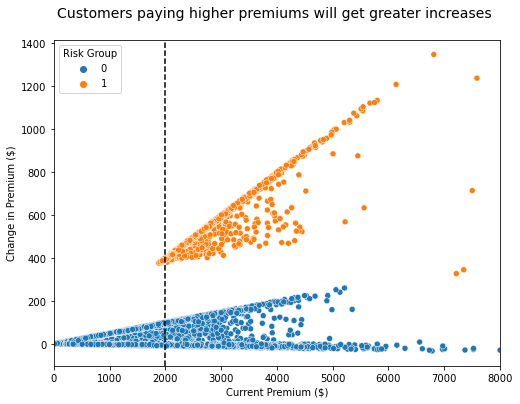

In [474]:
# clearly a bifurcation around change in premium of $260.05
plt.figure(figsize=(8,6))
g = sns.scatterplot(x='current_premium', y='change_in_premium', hue='Risk Group', data=df, legend='brief')

plt.axvline(2000, ls='--', color='black')
# plt.axvline(1883.93, ls='--', color='grey')
# plt.axvline(2.59, ls='--', color='grey')
# plt.fill_between(2000, 6000)
# plt.annotate('Charged $400 more', (2100,500), color='black')
# plt.annotate('Given a $5.50 discount', (2100,50), color='black')
plt.xlim([0,8000])
plt.xlabel('Current Premium ($)')
plt.ylabel('Change in Premium ($)')
plt.title('Customers paying higher premiums will get greater increases \n', fontsize=14)

plt.show()

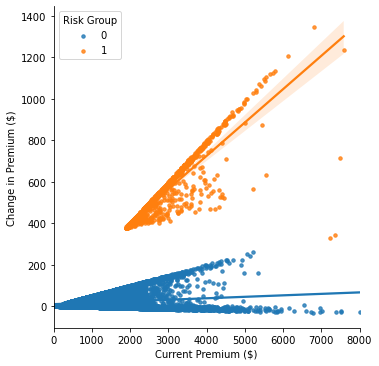

In [473]:
sns.lmplot(x='current_premium', y='change_in_premium', hue='Risk Group', data=df, legend=False,
          scatter_kws={'s': 12})

plt.xlim([0,8000])
# plt.ylim([0,1400])
plt.legend(loc='upper left', title='Risk Group')
plt.xlabel('Current Premium ($)')
plt.ylabel('Change in Premium ($)')

plt.show()

In [156]:
len(df)

92786

In [157]:
pd.set_option('display.max_columns', 100)

In [158]:
df.head()

territory gender  birthdate  ypc  current_premium  indicated_premium  \
0        601      M  10/5/1947    0           863.97             830.58   
1        601      F   7/6/1953    0           828.63             611.14   
2        601      M  4/18/1956    0          1000.59             593.99   
3        601      F  8/16/1956    0           700.42             547.95   
4        601      F  1/23/1957    0           505.92             448.33   

   selected_premium  underlying_premium  fixed_expenses  \
0            862.57              673.06          175.98   
1            826.43              612.75          175.98   
2            996.60              858.20          175.98   
3            697.84              571.49          180.48   
4            504.56              333.71          152.08   

   underlying_total_premium  cgr_factor  cgr   county  county_code  zipcode  \
0                    849.04        1.02  ZHK  CHARLES            8    20601   
1                    788.73        1.06  6NS  CHARLES            8    20601   
2                   1034.18        0.96  Z2D  CHARLES            8    20601   
3                    751.97        0.91  D7G  CHARLES            8    20601   
4                    485.79        1.06  3YN  CHARLES            8    20601   

      town  area  GEO.id2  population  perc_nonwhite  majority_minority  \
0  WALDORF   210    20601       24233      58.758717               True   
1  WALDORF   210    20601       24233      58.758717               True   
2  WALDORF   210    20601       24233      58.758717               True   
3  WALDORF   210    20601       24233      58.758717               True   
4  WALDORF   210    20601       24233      58.758717               True   

         age  change_in_premium  age_  Risk Group  risk_group_0  risk_group_1  \
0  73.126758              -1.40    73           0             1             0   
1  67.374416              -2.20    67           0             1             0   
2  64.589964              -3.99    65           0             1             0   
3  64.261415              -2.58    64           0             1             0   
4  63.823350              -1.36    64           0             1             0   

   perc_change_in_premium  
0               -0.162043  
1               -0.265498  
2               -0.398765  
3               -0.368350  
4               -0.268817

In [159]:
df.rename(columns={'Risk Group':'risk_group'}, inplace=True)

In [160]:
# df.to_csv('../data/allstate-main.csv', index=False)

#### Age

In [161]:
sns.reset_orig()

In [162]:
df['age'].describe()

count    92786.000000
mean        55.407317
std         15.030495
min         24.131912
25%         42.917377
50%         55.240012
75%         65.706346
max        120.884070
Name: age, dtype: float64

<AxesSubplot:>

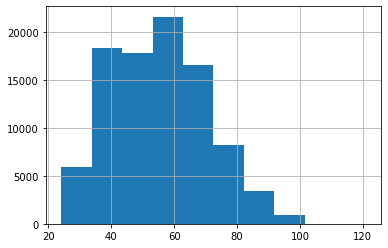

In [163]:
df['age'].hist()

In [165]:
df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 80, 125], labels=['20-40', '40-60', '60-80', '80+'])

In [166]:
df.groupby('age_group')['change_in_premium'].mean()

age_group
20-40    24.806863
40-60    30.929453
60-80    27.040984
80+      12.386502
Name: change_in_premium, dtype: float64

In [167]:
df['change_in_premium'].describe()

count    92786.000000
mean        27.385218
std         74.879726
min        -32.800000
25%         -2.020000
50%         -0.140000
75%         36.990000
max       1346.150000
Name: change_in_premium, dtype: float64

In [168]:
df['change_in_premium'].median()

-0.14000000000000057

<AxesSubplot:>

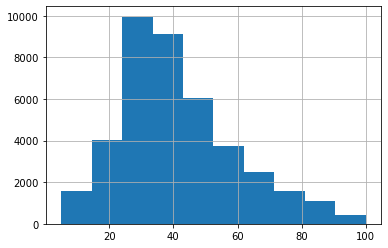

In [169]:
# majority of the values are between -10 and 10
# bimodal distribution – get the riskgroup 1 part
df['change_in_premium'].hist(range=[5,100])

<AxesSubplot:xlabel='age_group'>

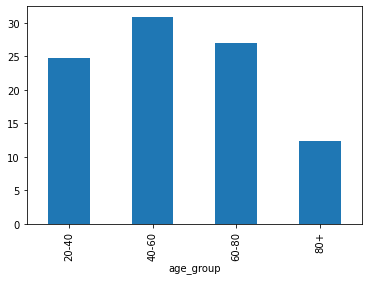

In [170]:
df.groupby('age_group')['change_in_premium'].mean().plot(kind='bar')

<AxesSubplot:xlabel='age_group'>

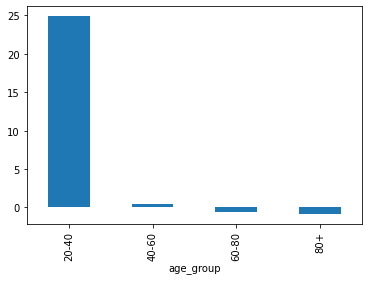

In [171]:
df.groupby('age_group')['change_in_premium'].median().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

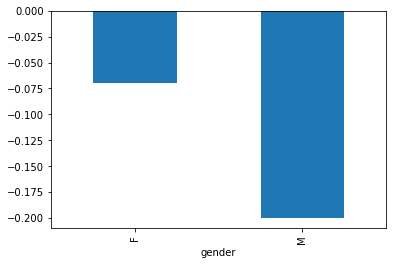

In [172]:
df.groupby('gender')['change_in_premium'].median().plot(kind='bar')

In [173]:
df['ypc'].value_counts()

5    61532
1     9139
3     6448
2     6425
0     4675
4     4567
Name: ypc, dtype: int64

<AxesSubplot:xlabel='ypc'>

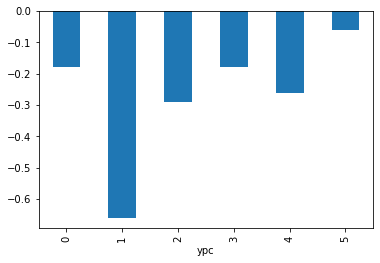

In [174]:
df.groupby('ypc')['change_in_premium'].median().plot(kind='bar')

In [175]:
df.groupby('ypc')['age'].mean()

ypc
0    49.595001
1    49.231872
2    50.705143
3    50.731070
4    50.924582
5    58.079853
Name: age, dtype: float64

### Compare Risk Groups

In [176]:
high_prem_grp = df[df['risk_group'] == 1].copy()
low_prem_grp = df[df['risk_group'] == 0].copy()

In [177]:
len(high_prem_grp), len(low_prem_grp)

(1835, 90951)

<AxesSubplot:>

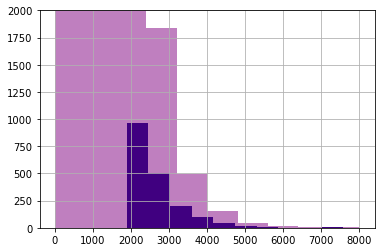

In [178]:
axes = plt.gca()
axes.set_ylim([0,2000])
high_prem_grp['current_premium'].hist(color='navy')
low_prem_grp['current_premium'].hist(color='purple', alpha=0.5)

In [179]:
high_prem_grp[high_prem_grp['current_premium'] == 1883.93]['change_in_premium']

69223    375.83
Name: change_in_premium, dtype: float64

In [180]:
high_prem_grp['current_premium'].describe()

count    1835.000000
mean     2629.746561
std       706.660310
min      1883.930000
25%      2137.530000
50%      2418.420000
75%      2868.845000
max      7584.320000
Name: current_premium, dtype: float64

In [181]:
len(high_prem_grp[high_prem_grp['current_premium'] > 2000])/len(high_prem_grp)*100

90.29972752043597

<AxesSubplot:>

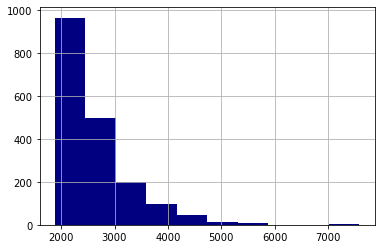

In [182]:
high_prem_grp['current_premium'].hist(color='navy')

In [183]:
low_prem_grp['current_premium'].describe()

count    90951.000000
mean       997.437407
std        551.052136
min          2.590000
25%        642.600000
50%        850.980000
75%       1189.760000
max       7998.980000
Name: current_premium, dtype: float64

In [184]:
len(low_prem_grp[low_prem_grp['current_premium'] > 2000])/len(low_prem_grp)*100

5.244582247583864

<AxesSubplot:>

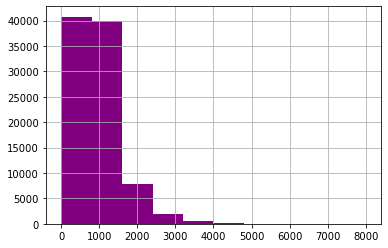

In [185]:
low_prem_grp['current_premium'].hist(color='purple')

#### Age groups by risk groups

In [186]:
age_groups = df.groupby(['age_group', 'risk_group'])['age_group'].agg({'count'})

In [187]:
age_groups.reset_index(inplace=True)

In [188]:
total_20to40 = age_groups[age_groups['age_group'] == '20-40']['count'].sum()
total_40to60 = age_groups[age_groups['age_group'] == '40-60']['count'].sum()
total_60to80 = age_groups[age_groups['age_group'] == '60-80']['count'].sum()
total_80plus = age_groups[age_groups['age_group'] == '80+']['count'].sum()

In [189]:
age_groups

age_group  risk_group  count
0     20-40           0  17635
1     20-40           1    120
2     40-60           0  38657
3     40-60           1    927
4     60-80           0  29078
5     60-80           1    752
6       80+           0   5581
7       80+           1     36

In [190]:
perc_20to40 = age_groups.iloc[:2,2]/total_20to40
perc_40to60 = age_groups.iloc[2:4,2]/total_40to60
perc_60to80 = age_groups.iloc[4:6,2]/total_60to80
perc_80plus = age_groups.iloc[6:8,2]/total_80plus

In [191]:
age_groups['percent'] = (np.array([perc_20to40, perc_40to60, perc_60to80, perc_80plus])*100).reshape(-1,1)

In [192]:
age_groups['percent'] = round(age_groups['percent'], 1)

In [193]:
age_groups

age_group  risk_group  count  percent
0     20-40           0  17635     99.3
1     20-40           1    120      0.7
2     40-60           0  38657     97.7
3     40-60           1    927      2.3
4     60-80           0  29078     97.5
5     60-80           1    752      2.5
6       80+           0   5581     99.4
7       80+           1     36      0.6

In [194]:
age_groups_ = age_groups.pivot(index='age_group', columns='risk_group', values=['count', 'percent'])

In [195]:
age_groups_

count        percent     
risk_group        0      1       0    1
age_group                              
20-40       17635.0  120.0    99.3  0.7
40-60       38657.0  927.0    97.7  2.3
60-80       29078.0  752.0    97.5  2.5
80+          5581.0   36.0    99.4  0.6

#### Gender by risk groups

In [196]:
gender_counts = df.groupby(['gender', 'risk_group'])['change_in_premium'].agg({'count'})

In [197]:
gender_counts

count
gender risk_group       
F      0           38883
       1             672
M      0           52068
       1            1163

In [198]:
risk_by_gender = pd.DataFrame({'0':[0.982936946, 0.978095818], 
                               '1':[0.017063054, 0.021904182]},
                              index=['Female', 'Male'])

In [199]:
risk_by_gender

0         1
Female  0.982937  0.017063
Male    0.978096  0.021904

In [200]:
# 30% more males than females
.021904/.017063

1.2837132977788197

In [201]:
# axes = plt.gca()
# axes.set_ylim([.95, 1])
# risk_by_gender.plot(kind='bar', stacked=True, legend=False, ax=axes)

## Q: Who is the CGI helping?

#### Or, who is getting a discount?

In [202]:
# cgi_diff = transition price - ideal price
df['cgi_diff'] = df['selected_premium'] - df['indicated_premium']

<AxesSubplot:xlabel='current_premium', ylabel='cgi_diff'>

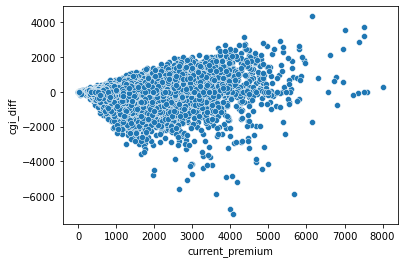

In [203]:
sns.scatterplot(x='current_premium', y='cgi_diff', data=df)

In [204]:
df['cgi_diff'].describe()

count    92786.000000
mean         0.106214
std        358.512671
min      -7036.420000
25%       -132.297500
50%         13.715000
75%        157.577500
max       4348.400000
Name: cgi_diff, dtype: float64

<AxesSubplot:>

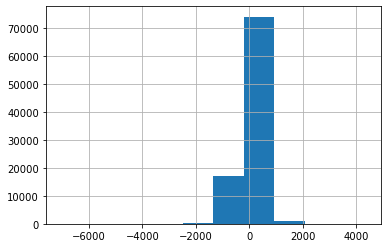

In [205]:
df['cgi_diff'].hist()

<AxesSubplot:xlabel='age_group', ylabel='cgi_diff'>

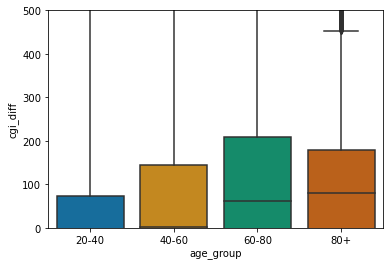

In [477]:
axes = plt.gca()
axes.set_ylim([0,500])
sns.boxplot(x='age_group', y='cgi_diff', data=df, ax=axes, palette='colorblind')

<AxesSubplot:xlabel='age_group', ylabel='cgi_diff'>

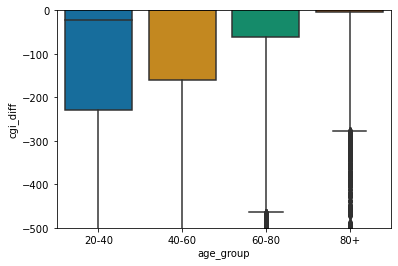

In [478]:
axes = plt.gca()
axes.set_ylim([-500,0])
sns.boxplot(x='age_group', y='cgi_diff', data=df, ax=axes, palette='colorblind')

<AxesSubplot:xlabel='gender', ylabel='cgi_diff'>

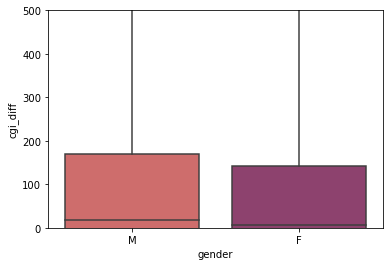

In [482]:
axes = plt.gca()
axes.set_ylim([0,500])
sns.boxplot(x='gender', y='cgi_diff', data=df, ax=axes, palette='flare')

<AxesSubplot:xlabel='gender', ylabel='cgi_diff'>

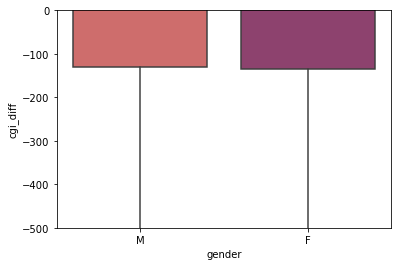

In [483]:
axes = plt.gca()
axes.set_ylim([-500,0])
sns.boxplot(x='gender', y='cgi_diff', data=df, ax=axes, palette='flare')

<AxesSubplot:xlabel='ypc', ylabel='cgi_diff'>

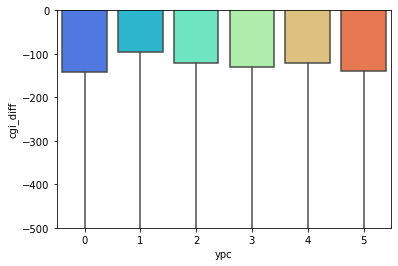

In [487]:
axes = plt.gca()
axes.set_ylim([-500,0])
sns.boxplot(x='ypc', y='cgi_diff', data=df, ax=axes, palette='rainbow')

<AxesSubplot:xlabel='ypc', ylabel='cgi_diff'>

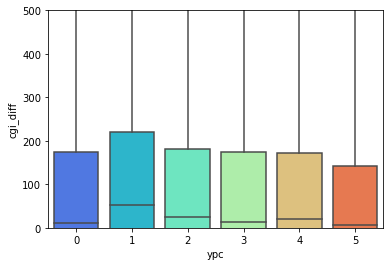

In [488]:
axes = plt.gca()
axes.set_ylim([0,500])
sns.boxplot(x='ypc', y='cgi_diff', data=df, ax=axes, palette='rainbow')

### Race

<AxesSubplot:>

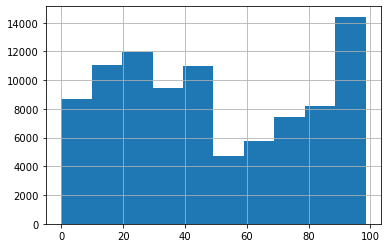

In [212]:
df['perc_nonwhite'].hist()

In [213]:
df['perc_nonwhite_group'] = pd.cut(df['perc_nonwhite'], bins=[0,20,40,60,80,100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

<AxesSubplot:xlabel='perc_nonwhite_group', ylabel='change_in_premium'>

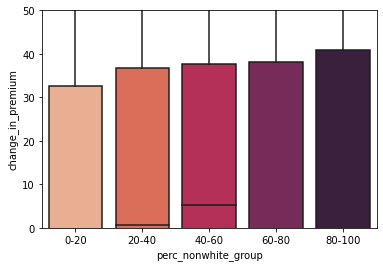

In [504]:
axes = plt.gca()
axes.set_ylim([0, 50])
sns.boxplot(x='perc_nonwhite_group', y='change_in_premium', data=df, palette='rocket_r')

<AxesSubplot:xlabel='perc_nonwhite_group', ylabel='change_in_premium'>

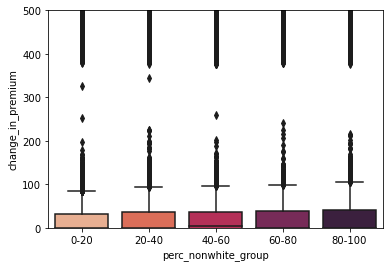

In [503]:
axes = plt.gca()
axes.set_ylim([0, 500])
sns.boxplot(x='perc_nonwhite_group', y='change_in_premium', data=df, palette='rocket_r')

<AxesSubplot:xlabel='minority', ylabel='cgi_diff'>

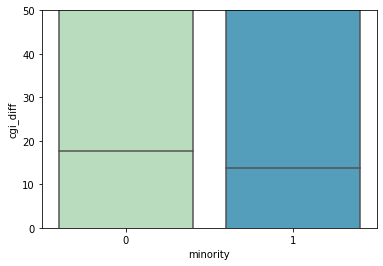

In [509]:
axes = plt.gca()
axes.set_ylim([0, 50])
sns.boxplot(x='minority', y='cgi_diff', data=df, palette='GnBu')

In [244]:
df_snapshot = df[['gender', 'age_', 'ypc', 'minority', 'current_premium', 'indicated_premium', 'selected_premium', 'change_in_premium', 'risk_group']].sample(frac=.5)



In [247]:
df_snapshot.rename(columns={'gender':'Gender', 'age_':'Age', 'ypc':'Years with Prior Carrier', 'minority': 'Minority',
                           'current_premium':'Current Premium', 'indicated_premium':'Indicated Premium', 
                           'selected_premium': 'Selected Premium', 'change_in_premium':'Change in Premium',
                           'risk_group': 'Risk Group'}, inplace=True)

In [251]:
# df_snapshot.head().reset_index(drop=True).to_csv('data-snapshot.csv')

In [243]:
# extremely imbalance classes
df['minority'].value_counts()

1    92503
0      283
Name: minority, dtype: int64

### Percent of Risk Group

In [175]:
sns.reset_defaults()

In [193]:
sns.reset_orig()

### Gender

In [194]:
df['gender_dummy'] = (df['gender'] == 'F').astype(int)

In [195]:
gender_counts_ = df.groupby(['risk_group', 'gender'])['change_in_premium'].agg({'count'})

In [196]:
total_0 = gender_counts_.reset_index()['count'][:2].sum()
total_1 = gender_counts_.reset_index()['count'][2:].sum()

In [197]:
gender_counts_['perc'] = np.array([gender_counts_['count'][:2]/total_0, gender_counts_['count'][2:]/total_1]).reshape(-1,1)
gender_counts_.reset_index(inplace=True)

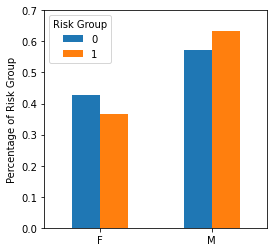

In [204]:
ax = plt.gca()
ax.set_ylim([0, .70])
gender_counts_.pivot(index='gender', columns='risk_group', values='perc').plot(kind='bar', ax=ax, figsize=(4,4))
plt.xticks(rotation=0)
plt.legend(title='Risk Group')
plt.xlabel('')
plt.ylabel('Percentage of Risk Group')
plt.show()

#### get equal heights

In [181]:
# gender_counts_p_same = gender_counts_.pivot(index='gender', columns='risk_group', values='perc')

In [182]:
# gender_counts_p_same[0] = gender_counts_p_same[1]

In [183]:
# gender_counts_p_same

In [184]:
# ax = plt.gca()
# ax.set_ylim([0, .75])
# gender_counts_p_same.plot(kind='bar', ax=ax, figsize=(4,4))
# plt.xticks(rotation=0)
# plt.legend(title='Risk Group')
# plt.xlabel('Gender')
# plt.ylabel('Percentage of Risk Group')
# plt.show()

### Age

In [205]:
age_groups = df.groupby(['risk_group', 'age_group'])['age_group'].agg({'count'})

In [206]:
age_groups.reset_index(inplace=True)

In [207]:
total_0 = age_groups.iloc[:4, 2].sum()
total_1 = age_groups.iloc[4:, 2].sum()

In [208]:
total_0_perc = age_groups[age_groups['risk_group'] == 0]['count']/total_0
total_1_perc = age_groups[age_groups['risk_group'] == 1]['count']/total_1

In [209]:
age_groups['perc'] = np.array([total_0_perc, total_1_perc]).reshape(-1,1)

In [210]:
age_groups

risk_group age_group  count      perc
0           0     20-40  17646  0.194017
1           0     40-60  38651  0.424965
2           0     60-80  29073  0.319656
3           0       80+   5581  0.061363
4           1     20-40    120  0.065395
5           1     40-60    927  0.505177
6           1     60-80    752  0.409809
7           1       80+     36  0.019619

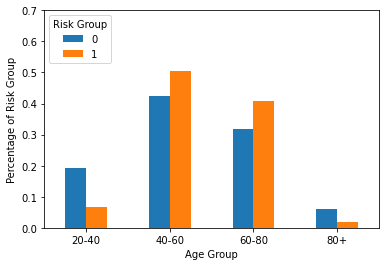

In [212]:
ax = plt.gca()
ax.set_ylim([0, 0.7])
age_groups.pivot(index='age_group', columns='risk_group', values='perc').plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.xlabel('Age Group')
plt.ylabel('Percentage of Risk Group')
plt.legend(title='Risk Group', loc='upper left')
plt.show()

#### get equal heights

In [213]:
# age_groups_p_same = age_groups.pivot(index='age_group', columns='risk_group', values='perc')

In [214]:
# age_groups_p_same[0] = age_groups_p_same[1]

In [215]:
# age_groups_p_same

In [216]:
# ax = plt.gca()
# ax.set_ylim([0, 0.7])
# age_groups_p_same.plot(kind='bar', ax=ax)
# plt.xticks(rotation=0)
# plt.xlabel('Age')
# plt.ylabel('Percentage of Risk Group')
# plt.legend(title='Risk Group', loc='upper left')
# plt.show()

### ypc

In [217]:
ypc_counts = df.groupby(['risk_group', 'ypc'])['risk_group'].agg({'count'}).reset_index()

In [218]:
ypc_counts

risk_group  ypc  count
0            0    0   4552
1            0    1   8952
2            0    2   6275
3            0    3   6304
4            0    4   4466
5            0    5  60402
6            1    0    123
7            1    1    187
8            1    2    150
9            1    3    144
10           1    4    101
11           1    5   1130

In [219]:
total_0 = ypc_counts.iloc[:6, 2].sum()
total_1 = ypc_counts.iloc[6:, 2].sum()

In [220]:
total_0_perc = ypc_counts[ypc_counts['risk_group'] == 0]['count']/total_0
total_1_perc = ypc_counts[ypc_counts['risk_group'] == 1]['count']/total_1

In [221]:
ypc_counts['perc'] = np.array([total_0_perc, total_1_perc]).reshape(-1,1)

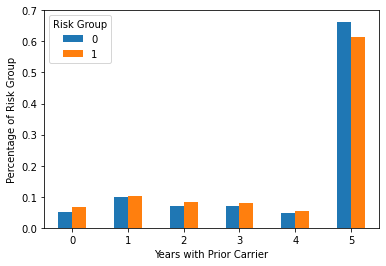

In [223]:
ax = plt.gca()
ax.set_ylim([0, 0.7])
ypc_counts.pivot(index='ypc', columns='risk_group', values='perc').plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.xlabel('Years with Prior Carrier')
plt.ylabel('Percentage of Risk Group')
plt.legend(title='Risk Group', loc='upper left')
plt.show()

### Race

#### Visualize resampled minority classes

In [226]:
df['majority_minority'] = df['majority_minority']*1

In [230]:
df.rename(columns={'majority_minority':'minority'}, inplace=True)

In [232]:
minority_counts = df.groupby(['risk_group', 'minority'])['minority'].agg({'count'}).reset_index()

In [233]:
minority_counts

risk_group  minority  count
0           0         0    280
1           0         1  90671
2           1         0      3
3           1         1   1832

In [230]:
total_0 = minority_counts.iloc[:2, 2].sum()
total_1 = minority_counts.iloc[2:, 2].sum()

In [231]:
total_0_perc = minority_counts[minority_counts['risk_group'] == 0]['count']/total_0
total_1_perc = minority_counts[minority_counts['risk_group'] == 1]['count']/total_1

In [232]:
minority_counts['perc'] = np.array([total_0_perc, total_1_perc]).reshape(-1,1)

In [233]:
minority_counts

risk_group  minority  count      perc
0           0         0    280  0.003079
1           0         1  90671  0.996921
2           1         0      3  0.001635
3           1         1   1832  0.998365

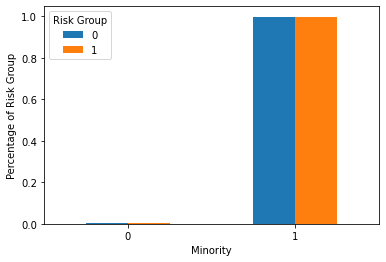

In [234]:
ax = plt.gca()
# ax.set_ylim([0, 0.7])
minority_counts.pivot(index='minority', columns='risk_group', values='perc').plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.xlabel('Minority')
plt.ylabel('Percentage of Risk Group')
plt.legend(title='Risk Group', loc='upper left')
plt.show()

### Bucket current prem

In [285]:
# df[df[['birthdate', 'gender', 'ypc', 'current_premium', ]].duplicated(keep=False)].sort_values(['birthdate', 'gender'])

In [286]:
# df_deduped = df[~df[['birthdate', 'gender', 'ypc', 'current_premium', ]].duplicated()].copy()

In [325]:
df['current_premium_bucket'] = pd.cut(df['current_premium'], bins=[0,1000,2000,3000,4000,5000,10000], 
                                     labels=['Up to \$1000', '\$1000 to \$2000', '\$2000 to \$3000', 
                                             '\$3000 to \$4000', '\$4000 to \$5000', '\$5000+'])



In [326]:
# df.rename(columns={'Risk Group':'risk_group'}, inplace=True)

In [327]:
df['current_premium'].describe()

count    92786.000000
mean      1029.719079
std        599.312723
min          2.590000
25%        646.630000
50%        860.470000
75%       1221.180000
max       7998.980000
Name: current_premium, dtype: float64

<AxesSubplot:>

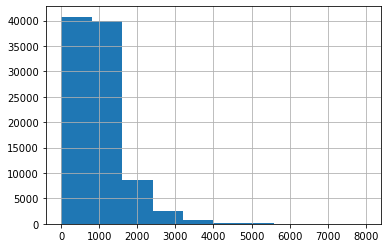

In [328]:
df['current_premium'].hist()

In [350]:
cur_prem_counts = df.groupby('current_premium_bucket')['risk_group_0', 'risk_group_1'].agg({'count', 'sum'})

/Users/abdur_rehman/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [351]:
cur_prem_counts = cur_prem_counts.reset_index()

In [360]:
cur_prem_counts.columns = ['Current Premium Range', 'Total', 'Risk Group 0', 'Total', 'Risk Group 1']

In [369]:
cur_prem_counts['Total_'] = cur_prem_counts[['Total']].iloc[:,0]

In [373]:
cur_prem_counts.drop(columns={'Total'}, inplace=True)

In [377]:
cur_prem_counts.rename(columns={'Total_':'Total'}, inplace=True)

In [381]:
tot_riskgrp0 = cur_prem_counts['Risk Group 0'].sum()
tot_riskgrp1 = cur_prem_counts['Risk Group 1'].sum()

In [391]:
cur_prem_counts['% Risk Group 0'] = cur_prem_counts['Risk Group 0']/tot_riskgrp0 * 100
cur_prem_counts['% Risk Group 1'] = cur_prem_counts['Risk Group 1']/tot_riskgrp1 * 100

In [393]:
cur_prem_counts

Current Premium Range  Risk Group 0  Risk Group 1  Total  % Risk Group 0  \
0          Up to \$1000       57606.0           0.0  57606       63.337401   
1      \$1000 to \$2000       28575.0         178.0  28753       31.418016   
2      \$2000 to \$3000        3776.0        1273.0   5049        4.151686   
3      \$3000 to \$4000         774.0         288.0   1062        0.851008   
4      \$4000 to \$5000         173.0          73.0    246        0.190212   
5               \$5000+          47.0          23.0     70        0.051676   

   % Risk Group 1  
0        0.000000  
1        9.700272  
2       69.373297  
3       15.694823  
4        3.978202  
5        1.253406

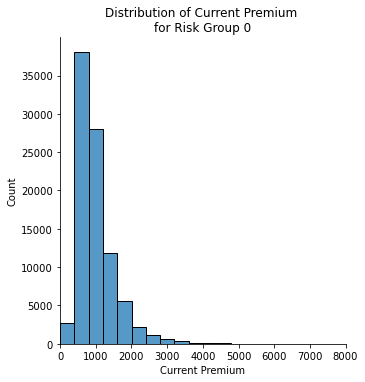

In [440]:
sns.displot(x='current_premium', data=df[df['risk_group_0'] == 1], bins=20, color='tab:blue')
plt.xlim([0,8000])
plt.xlabel('Current Premium')
plt.title('Distribution of Current Premium \nfor Risk Group 0')
plt.show()

In [456]:
8000/20

400.0

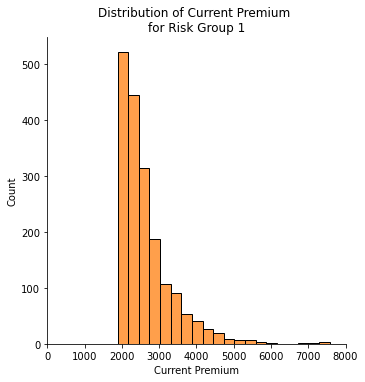

In [457]:
sns.displot(x='current_premium', data=df[df['risk_group_1'] == 1], bins=20, color='tab:orange')
plt.xlim([0,8000])
plt.xlabel('Current Premium')
plt.title('Distribution of Current Premium \nfor Risk Group 1')
plt.show()

In [510]:
df['current_premium_bucket'] = df['current_premium_bucket'].astype('str')

In [511]:
df['cur_prem_int'] = df['current_premium'].round().astype(int)

<AxesSubplot:>

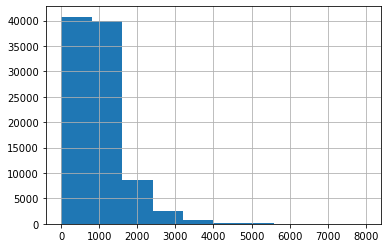

In [512]:
df['cur_prem_int'].hist()

In [513]:
df_counts = df.groupby('cur_prem_int')[['risk_group_0', 'risk_group_1']].sum().reset_index()

In [514]:
df_counts

cur_prem_int  risk_group_0  risk_group_1
0                3             1             0
1                5             1             0
2                6             3             0
3                7             5             0
4                8             4             0
...            ...           ...           ...
3733          7500             0             1
3734          7523             1             0
3735          7524             1             0
3736          7584             0             1
3737          7999             1             0

[3738 rows x 3 columns]

### filter to same current prem, diff risk group

In [515]:
df_test = df_deduped[df_deduped['current_premium_bucket'] == "(1000, 2000]"][['current_premium', 'risk_group']].copy()

In [516]:
# candidate for model
df_deduped[df_deduped['current_premium'] == 1999.53]

territory gender birthdate  ypc  current_premium  indicated_premium  \
46404       1078      F  8/5/1967    1          1999.53            1149.52   
66882       1222      M  1/7/1973    2          1999.53            3648.52   

       selected_premium  underlying_premium  fixed_expenses  \
46404           1996.66             1965.41          172.58   
66882           2395.66             1892.29          109.57   

       underlying_total_premium  cgr_factor  cgr     county  county_code  \
46404                   2137.99        0.93  AUR    HARFORD           12   
66882                   2001.86        1.21  OLT  BALTIMORE            3   

       zipcode            town  area  GEO.id2  population  perc_nonwhite  \
46404    21078  HAVRE DE GRACE   280    21078       18138      23.558275   
66882    21222       BALTIMORE   260    21222       53178      20.226409   

       majority_minority        age  change_in_premium  age_  risk_group  \
46404               True  53.293360              -2.87    53           0   
66882               True  47.866828             396.13    48           1   

       risk_group_0  risk_group_1 current_premium_bucket  cur_prem_int  
46404             1             0           (1000, 2000]          2000  
66882             0             1           (1000, 2000]          2000